# Top 1000 streamers na twitch 

## Projeto Ciência de Dados- Parte Final

### Integrantes do Grupo:

- João Pedro Soares de Araújo;
- José Wilton Monteiro Júnior; 
- João Victor Macedo.

## **1. INTRODUÇÃO:**
### *1.1 Motivação:*
A motivação se vem pelo fato da Twitch, ser uma plataforma na qual vem crescendo muito e agregando muito valor na vida dos jovens da nossa idade em meio a pandemia que passamos, visto que todos nós estamos passando mais tempo em casa. Fazendo com que haja ainda mais o interesse e engajamento em plataformas da internet. Diante disso decidimos então análisar essa crescente evolução na categoria dos gamers, onde um dos integrantes do nosso grupo (José Wilton) tem vivenciado na prática essa evolução, já que o mesmo trabalha na área.

### *1.2 Objetivo da análise:*
O projeto tem como objetivo analisar os dados do Top 1000 de Streamers da Twitch e descobrir onde se encontra o pico de maior desenvolvimento. separando os dados, filtrando informações e verificando as analises poderemos então finalizar essa analise e identificar se o pico de maior desenvolvimento se encontra no topo do top 1000 ou se está entre os membros que estão no final desta lista.

## **2. DADOS UTILIZADOS:**
### *2.1 Descrição do Dataset:*
O Dataset possui 11 colunas, onde nelas estão sendo analisadas o tempo assistido(em minutos), tempo stremado(em minutos), pico de visualizações, seguidores, seguidores ganhos, visualizações ganhas, parceria com a Twitch, canal +18 e idioma do Top 1000 streamers da Twitch.
### *2.2 Exploração inicial dos Dados:*

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dados = pd.read_csv("twitchdata-update.csv")
dados

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [4]:
seguidores = ["Followers gained", "Followers"]

In [5]:
dados[seguidores].sum(axis=1)

dados["seguidores"] = dados[seguidores].sum(axis=1)

Aqui foram usados apenas as colunas de seguidores e seguidores ganhos.

#### - Média:

In [6]:
media = dados[seguidores].mean().round(0)
media

Followers gained    205519.0
Followers           570054.0
dtype: float64

#### - Mediana:

In [7]:
mediana = dados[seguidores].median().round(0)
mediana

Followers gained     98352.0
Followers           318063.0
dtype: float64

#### - Desvio padrão:

In [8]:
dpadrao = dados[seguidores].std().round(0)
dpadrao

Followers gained    339914.0
Followers           804413.0
dtype: float64

#### - Box Plot:

<AxesSubplot:>

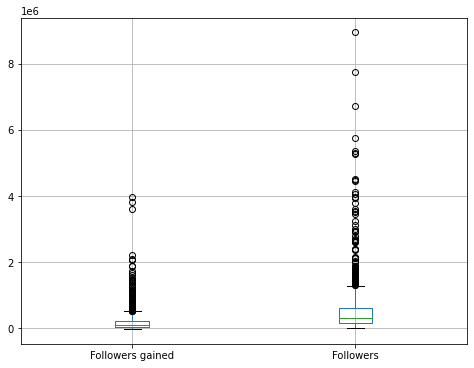

In [9]:
dados[seguidores].plot.box(grid=True, figsize=(8, 6))

## 3. Pré-Processamento:
### *3.1 Transformação e Limpeza de Dados:*
#### - Transformando em float:
Nessa transformação iremos transformar o "Average viewers" em float, já que a média de espectadores não é necessário que seja um número inteiro.

In [10]:
dados.astype({"Average viewers": float})

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,seguidores
0,xQcOW,6196161750,215250,222720,27716.0,3246298,1734810,93036735,True,False,English,4981108
1,summit1g,6091677300,211845,310998,25610.0,5310163,1370184,89705964,True,False,English,6680347
2,Gaules,5644590915,515280,387315,10976.0,1767635,1023779,102611607,True,True,Portuguese,2791414
3,ESL_CSGO,3970318140,517740,300575,7714.0,3944850,703986,106546942,True,False,English,4648836
4,Tfue,3671000070,123660,285644,29602.0,8938903,2068424,78998587,True,False,English,11007327
...,...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104.0,601927,562691,2162107,True,False,Spanish,1164618
996,빅헤드 (bighead033),122523705,153000,3940,793.0,213212,52289,4399897,True,False,Korean,265501
997,마스카 (newmasca),122452320,217410,6431,567.0,109068,-4942,3417970,True,False,Korean,104126
998,AndyMilonakis,122311065,104745,10543,1153.0,547446,109111,3926918,True,False,English,656557


#### -Transformando o Stream time(minutes) em Stream time(hours)
Já nesta transformação passamos o Stream time de minutos para horas, com o intuito de diminuir o tamanho dos números, consequentemente ficar mais fácil o entendimento, já que o padrão mundial é em horas.

In [11]:
dados["Stream time(minutes)"] = dados["Stream time(minutes)"] / 60
dados["Stream time(minutes)"]

0      3587.50
1      3530.75
2      8588.00
3      8629.00
4      2061.00
        ...   
995     226.00
996    2550.00
997    3623.50
998    1745.75
999    1653.00
Name: Stream time(minutes), Length: 1000, dtype: float64

## 4. Perguntas:
### *4.1 Quais os cinco streamers mais seguidos do Brasil?*

In [20]:
novo_dados= dados.loc[dados['Language']=='Portuguese']

In [21]:
colunas_select=['Channel','Followers']
filtro = novo_dados.filter(items=colunas_select)
filtro.sort_values(by='Followers', ascending = False)

,Channel,Followers
18,alanzoka,3445134
26,YoDa,1792625
2,Gaules,1767635
97,NOBRU,1549722
144,jukes,1327059
...,...,...
836,Pelegrino1993,80566
888,RaulZitoYT,78971
971,Buozzi,75290
715,LuquEt4,74404


**Os cinco Streamers mais assistidos do Brasil são:** Alanzoka (3445134), Yoda (1792625), Gaules (1767635), Nobru (1549722), Jukes (1327059).

### *4.2 Quais os cinco streamers com mais tempo assistido ?*

In [17]:
coluna_select=['Channel','Watch time(Minutes)']
filtros = dados.filter(items=coluna_select)
filtros.head()

,Channel,Watch time(Minutes)
0,xQcOW,6196161750
1,summit1g,6091677300
2,Gaules,5644590915
3,ESL_CSGO,3970318140
4,Tfue,3671000070


**Os cinco Streamers com mais tempo assistido são:** Xqcow (6196161750), Summit1g (6091677300), Gaules (5644590915), Esl_Csgo (3970318140), Tfue (3671000070).

### *4.3 Quais os cinco streamers com o maior pico de visualizações?*

In [18]:
coluna_select=['Channel','Peak viewers']
filtros = dados.filter(items=coluna_select)
filtros.head()

,Channel,Peak viewers
0,xQcOW,222720
1,summit1g,310998
2,Gaules,387315
3,ESL_CSGO,300575
4,Tfue,285644


Os cinco Streamers com maior pico de visualizações são: Xqcow (222720), Summit1g (310998), Gaules (387315), Esl_Csgo (300575), Tfue (285644).

### *4.4 Analise uma relação de crescimento entre duas variáveis .Qual a quantidade de ganhos de seguidores de acordo com a quantidade de visualizações ganhas,tendo visualizações ganhas como X?*

In [5]:
dados[["Views gained","Followers gained"]].corr()

,Views gained,Followers gained
Views gained,1.000000,0.244297
Followers gained,0.244297,1.000000


<AxesSubplot:xlabel='Views gained', ylabel='Followers gained'>

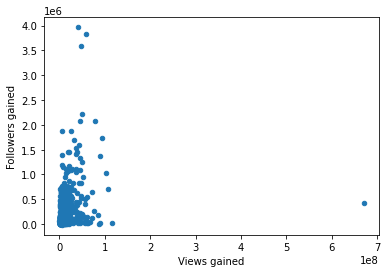

In [6]:
dados.plot.scatter(x="Views gained",y="Followers gained")

Portanto, podemos afirmar que a correlação existente entre Visualizações ganhas e Seguidores ganhos é fraca, pois está entre 0,2 e 0,4. Podemos notar também pelo gráfico que quase todos os canais estão justamente entre 0,2 e 0,4, representando justamente a correlação fraca.

### *4.5 Qual a relação do ganho de inscritos com a quantidade de tempo stremado dos streamers que falam inglês comparado aos streamers que falam português?*

In [29]:
portugues= dados.loc[dados['Language']=='Portuguese']

In [31]:
colunas_select=['Channel','Followers gained','Stream time(minutes)']
filtro = portugues.filter(items=colunas_select)
filtro.sort_values(by='Followers gained', ascending = False)

,Channel,Followers gained,Stream time(minutes)
97,NOBRU,1400039,38655
18,alanzoka,1325075,103770
2,Gaules,1023779,515280
108,Cellbit,547018,103095
106,Rakin,517248,144510
...,...,...,...
556,Rubini,43426,161985
971,Buozzi,39547,142785
914,mandiocaa1,29691,29685
655,gabepeixe,25034,101730


In [38]:
portugues[["Stream time(minutes)","Followers gained"]].corr()

,Stream time(minutes),Followers gained
Stream time(minutes),1.000000,-0.079781
Followers gained,-0.079781,1.000000


In [33]:
ingles= dados.loc[dados['Language']=='English']

In [34]:
colunas_select=['Channel','Followers gained','Stream time(minutes)']
filtro = ingles.filter(items=colunas_select)
filtro.sort_values(by='Followers gained', ascending = False)

,Channel,Followers gained,Stream time(minutes)
51,Bugha,2220765,100470
90,pokimane,2085831,56505
4,Tfue,2068424,123660
40,Fresh,1875187,147660
0,xQcOW,1734810,215250
...,...,...,...
603,Fairlight_Excalibur,5162,163650
859,MANvsGAME,2336,65775
779,Dyrus,111,138300
499,Amaz,-5405,84525


In [39]:
ingles[["Stream time(minutes)","Followers gained"]].corr()

,Stream time(minutes),Followers gained
Stream time(minutes),1.000000,-0.128596
Followers gained,-0.128596,1.000000


Portanto, podemos ver que a correlação dos Streamers que falam português e inglês, ambas são muito fracas, já que as correlações ficaram entre 0 e 0,2.

### 4.6 De acordo com o gráfico que separa as categorias pelo uso de linguagens, identificamos que à proporção que separa cada linguagem tem uma diferença enorme, mas qual seria o quantitativo exato de cada linguagem?

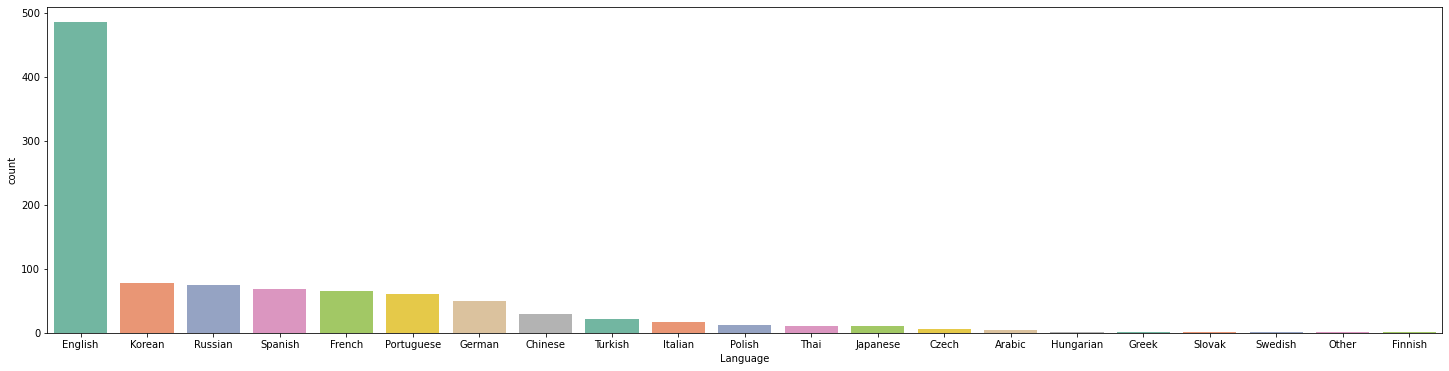

In [26]:
plt.figure(figsize=(25, 6))
plot = sns.countplot(x="Language", data=dados,order=dados['Language'].value_counts().index, palette="Set2")

In [28]:
dados['Language'].value_counts()

English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Greek           1
Slovak          1
Swedish         1
Other           1
Finnish         1
Name: Language, dtype: int64

**Os idiomas mais falados pelo Top 1000 Streamers são:** Inglês(485), Coreano(77), Russo(74), Espanhol(68), Frânces(66), Português(61), Alemão(49), Chinês(30), Turco(22), Italiano(17), Polônes(12), Tailandês(11), Japonês(10), Tcheco(6), Arábe(5), Húngaro(2), Grego(1), Eslovaco(1), Sueco(1), Outros(1) e Finlandês(1).

## 5. Conclusão:
### *5.1 Resultados Obtidos:*
Analisando os dados do Dataset de 1000 Streamers da Twitch, podemos identificar que não existe uma correlação exata entre ganho de seguidores com os usuários que já seguem cada streamer. Além de identificar isso, percebemos que a categoria gamer cresceu muito no Brasil, acreditamos que o motivo se dá pela pandemia que vivemos atualmente, mas ainda sim não é tão notável como imaginávamos, como podemos observar quando analisamos o topo 5, onde encontramos apenas 1 streamer brasileiro nesse pódio. Alexandre Borba, mais conhecido como Gaules, é o destaque da analise feita. Mesmo que esteja entre os cinco maiores streamers do mundo, pois ele não se encontra no top1 nas varias categorias analisadas; vendo na analise feita dos cinco streamers mais seguidos do Brasil.

Verificamos também o quanto é notável que o crescimento do Brasil, em relação à streamers, ainda é baixo quando comparamos as relações de seguidores ganhos com a quantidade de horas streamadas. Por mais que grandes streamers brasileiros fiquem varias horas online, o ganho de seguidores que ocorre nessa plataforma comparada com usuários de outros países, ainda é baixo. Em destaque temos Alanzoka que ocupa a 18ª posição do ranking mundial e pokimane que ocupa a 90ª posição. Alanzoka com 103770 horas streamadas ganhou em 1 ano, 1325075 seguidores e ja pokimane com apenas 58505 horas streamadas ganhou em 1 ano 2085831 seguidores, uma diferença de mais de 760mil seguidores.

Mesmo com o crescimento na audiência de alguns usuários, o Brasil ainda é muito jovem quando se trata de e-sport e devido à pandemia, a oferta tendeu a crescer muito, por isso os números não ficam tão gigantes assim para cada stream, podemos ver isso na tabela que retrata à proporção que separa cada linguagem, onde observamos que a busca por streamers na categoria de linguagem “inglês” é exorbitante, deixando uma diferença enorme entre o segundo lugar e maior ainda quando se trata da língua portuguesa.

No geral, é visível que a língua inglesa tem destaque como demonstra as categorias analisadas. Mas, mesmo que a diferença entre uns e outros e entre as linguagens sejam grandes, tanto positivamente quanto negativamente, uns podem ganhar uma enorme quantidade anual de seguidores e outros podem acabar perdendo também, ainda que não faça grande diferença para a quantidade já existente. Em relação ao tempo streamado com media de ganho de seguidores, a pequena relação e variação podem ocorrer devido ao tempo exaustivo de horas em que se deve permanecer sentado na frente do computador e que por um tempo se torna exaustivo. Por outro lado esse fator influencia bastante na quantidade de visualizações simultânea porque, quanto mais tempo se está ao vivo, mais pessoas vão ficando online e permanecendo até o fim da transmissão.


### *5.2 Limitações encontradas:*
- Dataset com poucas colunas de dados;
- Um tema não muito abrangente de informações;


### 5.3 *Trabalhos futuros e melhorias para serem realizadas:*
- Para trabalhos futuros queremos acrescentar mais gráficos para facilitar as visualizações e além disso buscar mais datasets do mesmo gênero para que possamos saber mais sobre o assunto tratado.

- As melhorias que podem ser realizadas são: a criação da coluna sobre o sexo do streamer, qual o jogo stremado, a idade de cada streamer e a comparação de crescimento em relação aos outros anos.